In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

BASE_DIR = "/content/drive/MyDrive/threads_sentiment_project"
DATA_DIR = os.path.join(BASE_DIR, "data")
MODELS_DIR = os.path.join(BASE_DIR, "models")
PLOTS_DIR = os.path.join(BASE_DIR, "plots")

os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)

BASE_DIR, DATA_DIR, MODELS_DIR, PLOTS_DIR

('/content/drive/MyDrive/threads_sentiment_project',
 '/content/drive/MyDrive/threads_sentiment_project/data',
 '/content/drive/MyDrive/threads_sentiment_project/models',
 '/content/drive/MyDrive/threads_sentiment_project/plots')

In [3]:
import os

os.listdir("/content/drive/MyDrive/threads_sentiment_project/data")

['threads_reviews.csv']

## Load Dataset


In [4]:
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/threads_sentiment_project/data/threads_reviews.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully")
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

df.head()

Dataset loaded successfully
Shape: (32910, 4)

Columns:
['source', 'review_description', 'rating', 'review_date']


,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


## Basic Data Inspection


In [5]:
# Check data types
print("Data types:\n")
print(df.dtypes)

# Check missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

Data types:

source                object
review_description    object
rating                 int64
review_date           object
dtype: object

Missing values per column:

source                0
review_description    0
rating                0
review_date           0
dtype: int64


In [6]:
# Check unique rating values
print("Unique rating values:")
print(sorted(df["rating"].unique()))

# Check review text length (quick look)
df["review_length"] = df["review_description"].astype(str).apply(len)

print("\nReview length summary:")
df["review_length"].describe()

Unique rating values:
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Review length summary:


,review_length
count,32910.000000
mean,65.734913
std,104.900408
min,1.000000
25%,11.000000
50%,28.000000
75%,79.000000
max,5947.000000


## Label Engineering


In [7]:
# Map rating to sentiment label
def rating_to_sentiment(r):
    if r in [1, 2]:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment"] = df["rating"].apply(rating_to_sentiment)

# Check distribution
df["sentiment"].value_counts()


,count
sentiment,
positive,18803
negative,11522
neutral,2585


## Sentiment Distribution


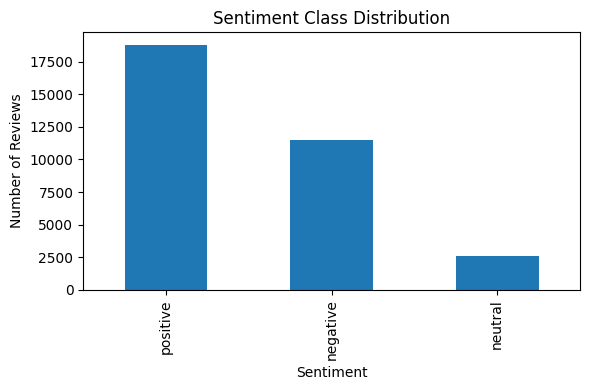

'/content/drive/MyDrive/threads_sentiment_project/plots/sentiment_distribution.png'

In [8]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()

# Save plot
plot_path = "/content/drive/MyDrive/threads_sentiment_project/plots/sentiment_distribution.png"
plt.savefig(plot_path)
plt.show()

plot_path

## Review Length Distribution


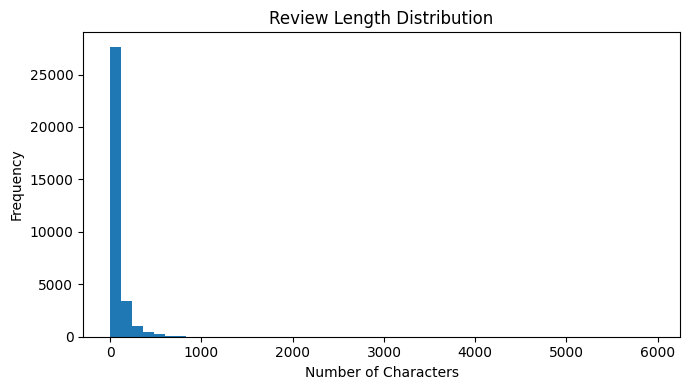

'/content/drive/MyDrive/threads_sentiment_project/plots/review_length_distribution.png'

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.hist(df["review_length"], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()

# Save plot
plot_path = "/content/drive/MyDrive/threads_sentiment_project/plots/review_length_distribution.png"
plt.savefig(plot_path)
plt.show()

plot_path


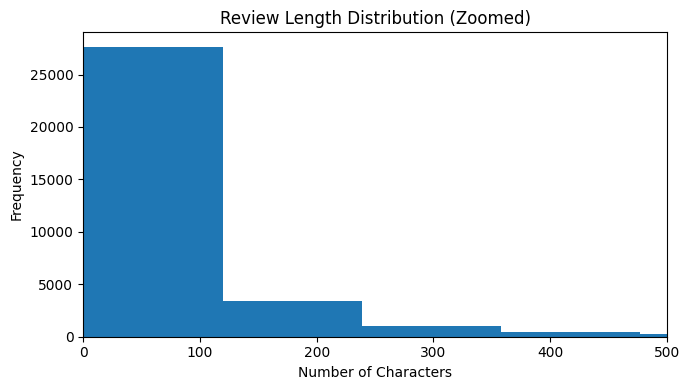

'/content/drive/MyDrive/threads_sentiment_project/plots/review_length_distribution_zoomed.png'

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.hist(df["review_length"], bins=50)
plt.xlim(0, 500)
plt.title("Review Length Distribution (Zoomed)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()

# Save zoomed plot
plot_path = "/content/drive/MyDrive/threads_sentiment_project/plots/review_length_distribution_zoomed.png"
plt.savefig(plot_path)
plt.show()

plot_path

## Text Preprocessing


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required resources (one-time)
nltk.download("punkt_tab")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)      # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)            # remove punctuation & numbers

    tokens = word_tokenize(text)                    # explicit tokenization
    tokens = [lemmatizer.lemmatize(w)
              for w in tokens if w not in stop_words]

    return " ".join(tokens)

# Apply preprocessing
df["clean_text"] = df["review_description"].apply(preprocess_text)

# Show before/after
df[["review_description", "clean_text"]].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,review_description,clean_text
0,Meh. Not the greatest experience on a Chromebo...,meh greatest experience chromebook seems custo...
1,Pretty good for a first launch!! Its easy to u...,pretty good first launch easy use selfexplanat...
2,"For a brand new app, it's very well optimized....",brand new app well optimized however missing q...
3,"Great app with a lot of potential! However, th...",great app lot potential however lot need fixed...
4,"The app is good, but it needs a lot of functio...",app good need lot functionality example search...


## TF-IDF Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and labels
X = df["clean_text"]
y = df["sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
    min_df=5,          # remove very rare noise words
    max_df=0.9,        # remove overly common words
    sublinear_tf=True  # log scaling
)

# Fit on training data, transform both
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((26328, 6299), (6582, 6299))

## Feature Engineering: VADER Sentiment Scores

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Extract sentiment scores for all reviews
df['vader_neg'] = df['review_description'].apply(lambda x: sia.polarity_scores(str(x))['neg'])
df['vader_neu'] = df['review_description'].apply(lambda x: sia.polarity_scores(str(x))['neu'])
df['vader_pos'] = df['review_description'].apply(lambda x: sia.polarity_scores(str(x))['pos'])
df['vader_compound'] = df['review_description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Show first few rows
df[['review_description', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,review_description,vader_neg,vader_neu,vader_pos,vader_compound
0,Meh. Not the greatest experience on a Chromebo...,0.148,0.773,0.080,-0.7117
1,Pretty good for a first launch!! Its easy to u...,0.000,0.606,0.394,0.9899
2,"For a brand new app, it's very well optimized....",0.059,0.758,0.184,0.9076
3,"Great app with a lot of potential! However, th...",0.081,0.847,0.072,0.4114
4,"The app is good, but it needs a lot of functio...",0.021,0.834,0.145,0.8860


In [15]:
from scipy.sparse import hstack
import numpy as np

# Get VADER features for train/test split
# Use .loc to match the split indices
vader_cols = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']

# Extract VADER features for training set
X_train_vader = df.loc[X_train.index, vader_cols].values

# Extract VADER features for test set
X_test_vader = df.loc[X_test.index, vader_cols].values

# Combine TF-IDF (sparse) with VADER (dense)
X_train_combined = hstack([X_train_tfidf, X_train_vader])
X_test_combined = hstack([X_test_tfidf, X_test_vader])

print("TF-IDF shape:", X_train_tfidf.shape)
print("VADER shape:", X_train_vader.shape)
print("Combined shape:", X_train_combined.shape)
print("\nFeatures combined successfully")

TF-IDF shape: (26328, 6299)
VADER shape: (26328, 4)
Combined shape: (26328, 6303)

Features combined successfully


## Logistic Regression

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

    negative       0.80      0.76      0.78      2304
     neutral       0.29      0.27      0.28       517
    positive       0.85      0.88      0.86      3761

    accuracy                           0.79      6582
   macro avg       0.64      0.64      0.64      6582
weighted avg       0.79      0.79      0.79      6582



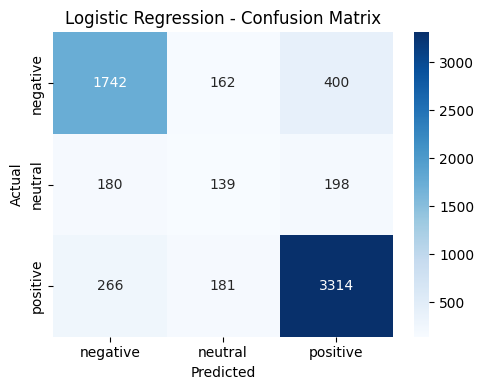


Confusion matrix saved to: /content/drive/MyDrive/threads_sentiment_project/plots/confusion_matrix_logistic_regression.png


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression with combined features
lr_model = LogisticRegression(
    C=2.0,
    max_iter=2000,
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

lr_model.fit(X_train_combined, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_combined)

# Classification report
print("Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=["negative", "neutral", "positive"])

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"],
    cmap="Blues"
)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Save confusion matrix
plot_path = f"{PLOTS_DIR}/confusion_matrix_logistic_regression.png"
plt.savefig(plot_path)
plt.show()

print(f"\nConfusion matrix saved to: {plot_path}")

## Support Vector Machine

Linear SVM - Classification Report:

              precision    recall  f1-score   support

    negative       0.79      0.74      0.77      2304
     neutral       0.25      0.26      0.25       517
    positive       0.84      0.87      0.86      3761

    accuracy                           0.78      6582
   macro avg       0.63      0.62      0.63      6582
weighted avg       0.78      0.78      0.78      6582



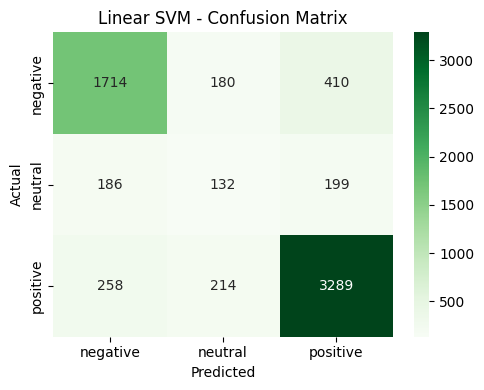


Confusion matrix saved to: /content/drive/MyDrive/threads_sentiment_project/plots/confusion_matrix_linear_svm.png


In [17]:
from sklearn.svm import LinearSVC

# Train Linear SVM with combined features
svm_model = LinearSVC(
    class_weight="balanced",
    random_state=42,
    max_iter=2000
)

svm_model.fit(X_train_combined, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_combined)

# Classification report
print("Linear SVM - Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=["negative", "neutral", "positive"])

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"],
    cmap="Greens"
)
plt.title("Linear SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Save confusion matrix
plot_path = f"{PLOTS_DIR}/confusion_matrix_linear_svm.png"
plt.savefig(plot_path)
plt.show()

print(f"\nConfusion matrix saved to: {plot_path}")

## Naive Bayes


In [18]:
from scipy.sparse import hstack

# Use ONLY non-negative VADER features for Naive Bayes
vader_nb_cols = ["vader_neg", "vader_neu", "vader_pos"]

X_train_vader_nb = df.loc[X_train.index, vader_nb_cols].values
X_test_vader_nb = df.loc[X_test.index, vader_nb_cols].values

# Combine TF-IDF + NB-safe VADER features
X_train_combined_nb = hstack([X_train_tfidf, X_train_vader_nb])
X_test_combined_nb = hstack([X_test_tfidf, X_test_vader_nb])

X_train_combined_nb.shape, X_test_combined_nb.shape


((26328, 6302), (6582, 6302))

Naive Bayes (TF-IDF + VADER) - Classification Report:

              precision    recall  f1-score   support

    negative       0.77      0.78      0.77      2304
     neutral       0.40      0.04      0.08       517
    positive       0.82      0.91      0.86      3761

    accuracy                           0.80      6582
   macro avg       0.66      0.58      0.57      6582
weighted avg       0.77      0.80      0.77      6582



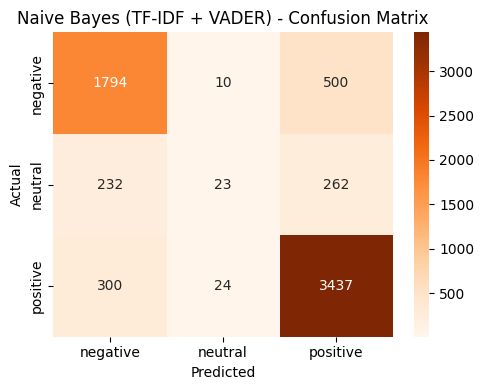


Confusion matrix saved to: /content/drive/MyDrive/threads_sentiment_project/plots/confusion_matrix_naive_bayes_combined.png


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Naive Bayes with COMBINED features
nb_model = MultinomialNB()
nb_model.fit(X_train_combined_nb, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_combined_nb)

# Classification report
print("Naive Bayes (TF-IDF + VADER) - Classification Report:\n")
print(classification_report(y_test, y_pred_nb))

# Confusion matrix
cm_nb = confusion_matrix(
    y_test,
    y_pred_nb,
    labels=["negative", "neutral", "positive"]
)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt="d",
    xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"],
    cmap="Oranges"
)
plt.title("Naive Bayes (TF-IDF + VADER) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

plot_path = f"{PLOTS_DIR}/confusion_matrix_naive_bayes_combined.png"
plt.savefig(plot_path)
plt.show()

print(f"\nConfusion matrix saved to: {plot_path}")


## Model Comparison


In [21]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression (TF-IDF + VADER)",
        "Linear SVM (TF-IDF + VADER)",
        "Naive Bayes (TF-IDF + VADER)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_nb)
    ],
    "Macro F1": [
        f1_score(y_test, y_pred_lr, average="macro"),
        f1_score(y_test, y_pred_svm, average="macro"),
        f1_score(y_test, y_pred_nb, average="macro")
    ]
})

comparison


,Model,Accuracy,Macro F1
0,Logistic Regression (TF-IDF + VADER),0.789274,0.639229
1,Linear SVM (TF-IDF + VADER),0.780158,0.626747
2,Naive Bayes (TF-IDF + VADER),0.798238,0.572884


In [54]:
from sklearn.metrics import classification_report
import pandas as pd

# Extract per-class F1 scores
def get_f1_per_class(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Model": model_name,
        "Negative F1": report["negative"]["f1-score"],
        "Neutral F1": report["neutral"]["f1-score"],
        "Positive F1": report["positive"]["f1-score"]
    }

f1_comparison = pd.DataFrame([
    get_f1_per_class(y_test, y_pred_lr, "Logistic Regression"),
    get_f1_per_class(y_test, y_pred_svm, "Linear SVM"),
    get_f1_per_class(y_test, y_pred_nb, "Naive Bayes")
])

f1_comparison


,Model,Negative F1,Neutral F1,Positive F1
0,Logistic Regression,0.775601,0.278278,0.863808
1,Linear SVM,0.768265,0.253116,0.858859
2,Naive Bayes,0.768756,0.047016,0.863721


## Per-class F1 comparison

In [22]:
from sklearn.metrics import classification_report

def extract_f1(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Model": model_name,
        "Negative F1": report["negative"]["f1-score"],
        "Neutral F1": report["neutral"]["f1-score"],
        "Positive F1": report["positive"]["f1-score"]
    }

f1_per_class = pd.DataFrame([
    extract_f1(y_test, y_pred_lr, "Logistic Regression"),
    extract_f1(y_test, y_pred_svm, "Linear SVM"),
    extract_f1(y_test, y_pred_nb, "Naive Bayes")
])

f1_per_class


,Model,Negative F1,Neutral F1,Positive F1
0,Logistic Regression,0.775601,0.278278,0.863808
1,Linear SVM,0.768265,0.253116,0.858859
2,Naive Bayes,0.774946,0.080139,0.863568


## Grouped Bar Chart: Accuracy vs Macro F1 of Models

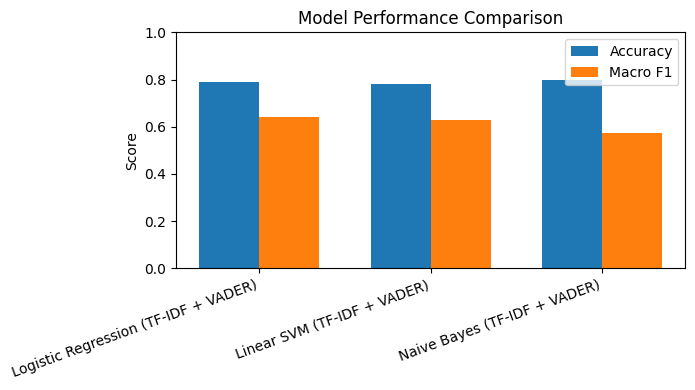

'/content/drive/MyDrive/threads_sentiment_project/plots/accuracy_macro_f1_comparison.png'

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = comparison["Model"]
accuracy = comparison["Accuracy"]
macro_f1 = comparison["Macro F1"]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(7, 4))
plt.bar(x - width/2, accuracy, width, label="Accuracy")
plt.bar(x + width/2, macro_f1, width, label="Macro F1")

plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x, models, rotation=20, ha="right")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

plot_path = f"{PLOTS_DIR}/accuracy_macro_f1_comparison.png"
plt.savefig(plot_path)
plt.show()

plot_path

## Top TF-IDF Features Contributing to Sentiment

In [25]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Train TF-IDF-only Logistic Regression for interpretability
lr_tfidf_only = LogisticRegression(
    C=2.0,
    max_iter=2000,
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

lr_tfidf_only.fit(X_train_tfidf, y_train)

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Create coefficient DataFrame
coef_df = pd.DataFrame(
    lr_tfidf_only.coef_,
    columns=feature_names,
    index=lr_tfidf_only.classes_
)

TOP_N = 10

for sentiment in coef_df.index:
    print(f"\nTop TF-IDF features for class: {sentiment}")
    display(
        coef_df.loc[sentiment]
        .sort_values(ascending=False)
        .head(TOP_N)
    )



Top TF-IDF features for class: negative


,negative
worst,6.183729
useless,5.094616
glitching,4.481082
twitter best,4.433594
garbage,4.367735
glitch,4.272626
copy,4.237839
horrible,4.132172
cant,4.109882
poor,4.102530



Top TF-IDF features for class: neutral


,neutral
insta thread,3.673694
awesome application,3.633515
meaning,3.542194
flaw,3.476977
mine,3.467321
bio,3.441046
frankly,3.226893
gif,3.211793
account follow,3.211621
option change,3.179438



Top TF-IDF features for class: positive


,positive
better twitter,4.815531
awesome,4.371503
great,3.264895
love,3.173340
wonderful,2.984410
easy,2.947071
amazing,2.924563
best,2.773411
far,2.657787
happy,2.531055


These features align with intuitive sentiment cues commonly found in user reviews, supporting the effectiveness of TF-IDF representations for sentiment classification.


## Analysis: Why Neutral Sentiment Is Difficult to Classify

The neutral class consistently shows the lowest recall and F1-score across all models.
This behavior can be explained by both data characteristics and task formulation.

First, neutral labels are derived from 3-star ratings, which often contain mixed or ambiguous sentiment.
Many reviews labeled as neutral include both positive and negative opinions, making them harder to separate
from polarized classes.

Second, exploratory data analysis shows that neutral reviews tend to be shorter on average and contain
fewer sentiment-bearing keywords. As a result, TF-IDF features provide weaker signals for this class.

Finally, lexicon-based features such as VADER scores often assign moderate polarity values to neutral texts,
causing overlap with both positive and negative distributions.

These factors collectively explain the consistently low performance on the neutral class across all models.


## Analysis: Comparison of Model Behavior

Logistic Regression and Linear SVM demonstrate similar overall performance, reflecting their shared reliance
on linear decision boundaries in high-dimensional TF-IDF feature space. Logistic Regression slightly
outperforms Linear SVM in macro F1-score, likely due to its probabilistic nature and better handling of
borderline cases.

Naive Bayes achieves the highest accuracy but performs poorly on the neutral class. This is due to its
strong conditional independence assumption, which is violated in natural language where word dependencies
carry important sentiment cues. As a result, Naive Bayes tends to over-predict majority classes.

Overall, Logistic Regression provides the best balance between performance, interpretability, and robustness,
making it the most suitable model for deployment in this sentiment analysis task.


In [26]:
NOTEBOOKS_DIR = os.path.join(BASE_DIR, "notebooks")
os.makedirs(NOTEBOOKS_DIR, exist_ok=True)

NOTEBOOKS_DIR

'/content/drive/MyDrive/threads_sentiment_project/notebooks'

In [27]:
import joblib

# Save TF-IDF vectorizer
joblib.dump(tfidf, os.path.join(MODELS_DIR, "tfidf_vectorizer.joblib"))

# Save trained models
joblib.dump(lr_model, os.path.join(MODELS_DIR, "logistic_regression_combined.joblib"))
joblib.dump(svm_model, os.path.join(MODELS_DIR, "linear_svm_combined.joblib"))
joblib.dump(nb_model, os.path.join(MODELS_DIR, "naive_bayes_combined.joblib"))

print("Models and vectorizer saved in:", MODELS_DIR)

Models and vectorizer saved in: /content/drive/MyDrive/threads_sentiment_project/models
